In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
import wfg
import lhsmdu
from testsuite.utilities import Pareto_split

In [19]:
func = wfg.WFG1
n_obj = 2
l = 6
k = 4
n_dim = k+l

M = n_obj
N = 20000
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z
    
limits = np.zeros((2, n_dim))
limits[1] = np.array(range(1,n_dim+1))*2

In [20]:
n_dim

10

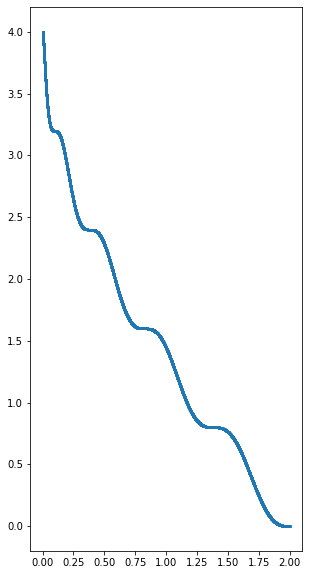

In [3]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()
ax.set_aspect('equal')
ax.scatter(*y.T, s=2)

In [33]:
lhs_x = np.array(lhsmdu.sample(numDimensions=n_dim, numSamples=1000)).T# *np.array([2, 1.5])

lhs_x.shape

(1000, 10)

In [35]:
lhs_x = lhs_x*np.round(x.max(axis=0), 0)

In [36]:
lhs_y =  np.array([func(lhs_xi, k, M) for lhs_xi in lhs_x])
pi, di = Pareto_split(lhs_y, return_indices=True)
lhs_y.shape

(1000, 2)

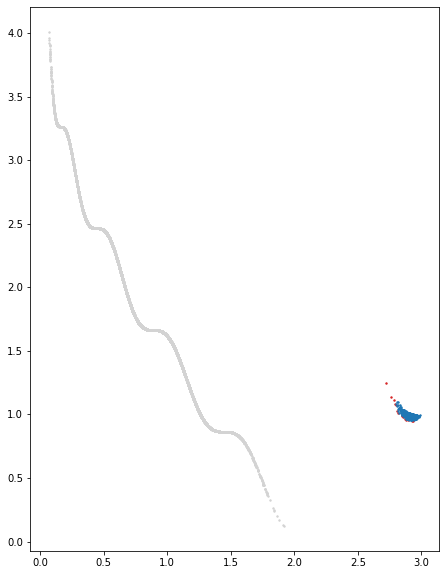

In [37]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()
ax.set_aspect('equal')
ax.scatter(*lhs_y[pi].T, s=2, c="C3")
ax.scatter(*lhs_y[di].T, s=2, c="C0")
ax.scatter(*y.T, s=2, c="lightgrey")
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 4])

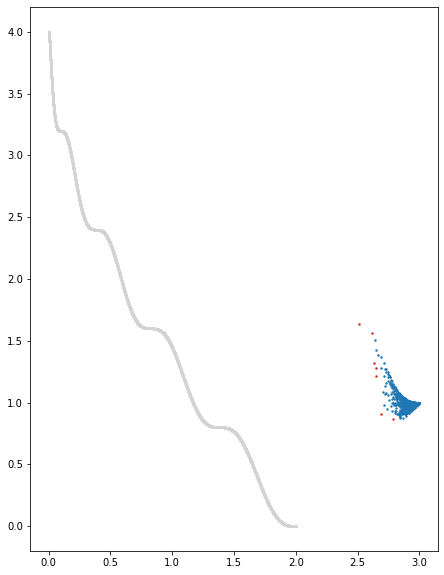

In [18]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()
ax.set_aspect('equal')
ax.scatter(*lhs_y[pi].T, s=2, c="C3")
ax.scatter(*lhs_y[di].T, s=2, c="C0")
ax.scatter(*y.T, s=2, c="lightgrey")
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 4])

In [7]:
limits = np.zeros((2, n_dim))
limits[1] = np.array(range(1,n_dim+1))*2
limits

array([[0., 0.],
       [2., 4.]])

In [9]:
x.max(axis=0)

array([1.99935721, 1.4       ])